# K-means Clustering

## Outline
- [ 1 - Implementing K-means](#1)
  - [ 1.1 - Finding clossest centroids](#1.1)
  - [ 1.2 - Computing centroid means](#1.2)
- [ 2 - K-means on a sample dataset](#2)
- [ 3 - Random initialization](#3)
- [ 4 - Image compression with K-means](#4)

<a name = "1"></a>
## 1 - Implementing K-means

In [15]:
import numpy as np

<a name = "1.1"></a>
### 1.1 - Finding closest centroids

In [36]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids
        
    Returns:
        idx (array_like): (m,) closest centroids
        
    """
    # Set K
    K = centroids.shape[0]
    
    # The following variables will be returned
    idx = np.zeros(X.shape[0], dtype=int)
    
    # for loop
    for i in range(X.shape[0]): # loop through all the training sample   
        
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        
        for j in range(centroids.shape[0]): # loop through all the centroids
            
            # norm_ij = norm between (X[i] - centroids[j])
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            
            distance.append(norm_ij)
        
        # idx[i] = return index of the min val in distance to be the centroid memberships
        idx[i] = np.argmin(distance)
        
    return idx

<a name="1.2"></a>
### 1.2 - Computing centroid means

In [53]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                        example in X.
        K (int):        number of centroids
        
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # variables
    m, n = X.shape
    
    # the following variable will be returned
    centroids = np.zeros((K, n))
    
    # for loop
    for i in range(K): # loop through number of centroids 
        
        for j in range(m): # loop through number of number of X
            # Check if X[j] is the current centroid memberships
            if idx[j] == i:
                # Accumulate the centroids
                centroids[i] += X[j]
        centroids[i] /= np.sum(idx == i)
        
    return centroids

<a name ="2"></a>
## 2 - K-means on a sample dataset

In [38]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algor on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    
    # Run K-Means
    for i in range(max_iters):
        
        # Output progress
        print("K-Means iteration %d/%d" % (i, max_iters - 1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    
    return centroids, idx

<a name="3"></a>
## 3 - Random Initialization of the centroids

Initializing the centroid with selecting random examples from the training set.

In [39]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters
        
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly re-order the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name ="4"></a>
## 4 - Image Compression with K-means

<a name ="4.1"></a>
### 4.1 Dataset

**Load image**

In [57]:
import matplotlib.pyplot as plt
original_img = plt.imread('pulp fiction.png')

**Visualize image**

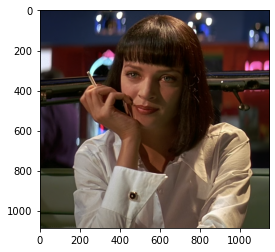

In [58]:
plt.imshow(original_img)

**Check the dimension of the variable**

In [59]:
original_img.shape

(1086, 1144, 4)

**Processing data**

In [60]:
# Divide by 255 so that all values are in the range 0 - 1 (for JPG file)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# Each row will contain the R, G and B pixel values

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], original_img.shape[2]))
X_img.shape

(1242384, 4)

<a name="4.2"></a>
### 4.2 - K-Means on image pixels

In [61]:
# Hyperparameters
K = 16
max_iters = 10

# Initialize centroid 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

(16, 4)
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<a name="4.3"></a>
### 4.3 Compress the image

In [79]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

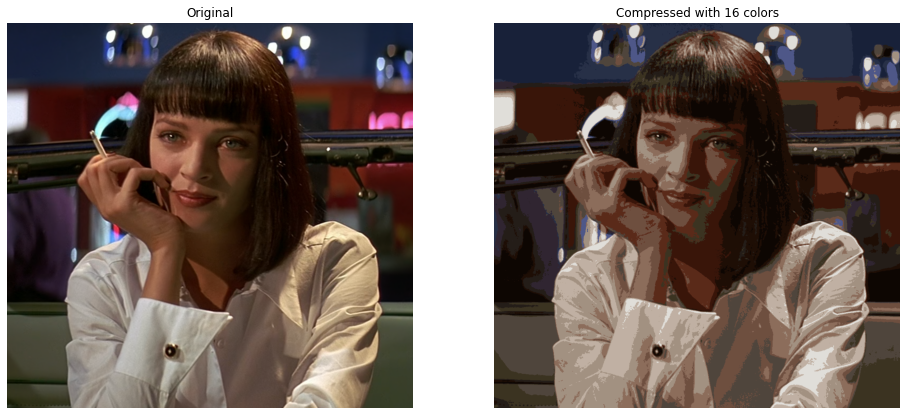

In [80]:
fig, ax = plt.subplots(1,2, figsize = (16,16))
plt.axis("off")

# Display original image
ax[0].imshow(original_img)
ax[0].set_title("Original")
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title("Compressed with %d colors" %K)
ax[1].set_axis_off()